In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 118.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ed77c203dc4b0bad2773a7dd5fd370d044affd4160470728f78c5ed0ef261c56
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attem

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<ipython-input-4-96e86ed0cfdc>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
train_r = '/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/train.csv'
test_r= '/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/test.csv'
#temp_r='/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/prob.csv'
#tempT_r='/content/drive/MyDrive/Colab Notebooks/dacon/law contest/data/probT.csv'

In [6]:
train = pd.read_csv(train_r)
test = pd.read_csv(test_r)
#new = pd.read_csv(temp_r)
#newT=pd.read_csv(tempT_r)

In [7]:
train.columns

Index(['ID', 'first_party', 'second_party', 'facts', 'first_party_winner'], dtype='object')

In [8]:
test.columns

Index(['ID', 'first_party', 'second_party', 'facts'], dtype='object')

In [9]:
train.rename(columns={'facts':'facts_Org'},inplace=True)
test.rename(columns={'facts':'facts_Org'},inplace=True)

In [10]:
train.head()

,ID,first_party,second_party,facts_Org,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [ ]:
profile = ProfileReport(train, title="Pandas Profiling Report")

In [ ]:
profile.to_file("pandas_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts_Org           2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [12]:
train=pd.get_dummies(train, columns=['first_party_winner'],drop_first=True)
train

,ID,first_party,second_party,facts_Org,first_party_winner_1
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [13]:
train.rename(columns={'first_party_winner_1':'first_party_winner'},inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts_Org           2478 non-null   object
 4   first_party_winner  2478 non-null   uint8 
dtypes: object(4), uint8(1)
memory usage: 80.0+ KB


In [15]:
temp=train
temp

,ID,first_party,second_party,facts_Org,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [16]:
import re
from bs4 import BeautifulSoup

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
# Remove HTTP tags
%time temp['facts_Processed']=temp['facts_Org'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
%time test['facts_Processed']=test['facts_Org'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
temp

CPU times: user 443 ms, sys: 0 ns, total: 443 ms
Wall time: 466 ms
CPU times: user 225 ms, sys: 0 ns, total: 225 ms
Wall time: 236 ms


,ID,first_party,second_party,facts_Org,first_party_winner,facts_Processed
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,On June 27 1962 Phil St Amant a candidate for ...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,Ramon Nelson was riding his bike when he suffe...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,An Alabama state court convicted Billy Joe Mag...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,Victor Linkletter was convicted in state court...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,On April 24 1953 in Selma Alabama an intruder ...
...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1,Congress amended the Clean Air Act through the...
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1,Alliance Bond Fund Inc an investment fund purc...
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0,In 1992 the District Court sentenced Manuel D ...
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0,On March 8 1996 Enrico St Cyr a lawful permane...


In [24]:
#remove name

from nltk.corpus import names
all_names=set(names.words())

%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in all_names]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in all_names]))
test.head()

CPU times: user 87.8 ms, sys: 0 ns, total: 87.8 ms
Wall time: 215 ms
CPU times: user 47.8 ms, sys: 0 ns, total: 47.8 ms
Wall time: 91.1 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,Lexecon Inc was a defendant in a class action ...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",In 2002 and 2003 Television Stations broadcast...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",In 1993 a magistrate judge issued a warrant au...


In [25]:
#Lower Case
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: x.lower())
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: x.lower())
test.head()

CPU times: user 4.47 ms, sys: 0 ns, total: 4.47 ms
Wall time: 9.18 ms
CPU times: user 1.15 ms, sys: 699 µs, total: 1.85 ms
Wall time: 1.85 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,the 1984 bail reform act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc was a defendant in a class action ...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",in 2002 and 2003 television stations broadcast...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,during his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",in 1993 a magistrate judge issued a warrant au...


In [26]:
#Remove punctuations
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
test.head()

CPU times: user 49.2 ms, sys: 0 ns, total: 49.2 ms
Wall time: 59.1 ms
CPU times: user 23.6 ms, sys: 0 ns, total: 23.6 ms
Wall time: 25.6 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,the 1984 bail reform act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc was a defendant in a class action ...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",in 2002 and 2003 television stations broadcast...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,during his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",in 1993 a magistrate judge issued a warrant au...


In [28]:
#Remove unicodes
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
test.head()

CPU times: user 49 ms, sys: 0 ns, total: 49 ms
Wall time: 55.6 ms
CPU times: user 24.4 ms, sys: 0 ns, total: 24.4 ms
Wall time: 26.2 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,the 1984 bail reform act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc was a defendant in a class action ...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",in 2002 and 2003 television stations broadcast...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,during his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",in 1993 a magistrate judge issued a warrant au...


In [29]:
#Remove numbaer
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x: re.sub(r'[0-9]', '', x))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x: re.sub(r'[0-9]', '', x))
test.head()

CPU times: user 42.6 ms, sys: 0 ns, total: 42.6 ms
Wall time: 48.7 ms
CPU times: user 21.1 ms, sys: 0 ns, total: 21.1 ms
Wall time: 21.1 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,the bail reform act allowed the federal court...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc was a defendant in a class action ...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",in and television stations broadcast the bil...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,during his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",in a magistrate judge issued a warrant author...


In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [31]:
month=['january', 'febuary', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

In [32]:
# Remove stopwords
stop_words = stopwords.words('english')
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
test.head()

CPU times: user 575 ms, sys: 2.77 ms, total: 577 ms
Wall time: 595 ms
CPU times: user 218 ms, sys: 0 ns, total: 218 ms
Wall time: 219 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,bail reform act allowed federal courts detain ...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc defendant class action lawsuit usc...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",television stations broadcast billboard music ...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,trial armed robbery federally insured savings ...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",magistrate judge issued warrant authorizing se...


In [33]:
# Remove month
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in month]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in month]))
test.head()

CPU times: user 71.6 ms, sys: 1.59 ms, total: 73.2 ms
Wall time: 80.5 ms
CPU times: user 38.5 ms, sys: 0 ns, total: 38.5 ms
Wall time: 38.7 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,bail reform act allowed federal courts detain ...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc defendant class action lawsuit usc...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",television stations broadcast billboard music ...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,trial armed robbery federally insured savings ...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",magistrate judge issued warrant authorizing se...


In [34]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
test.head()

CPU times: user 2.95 s, sys: 24.4 ms, total: 2.98 s
Wall time: 3.06 s
CPU times: user 776 ms, sys: 0 ns, total: 776 ms
Wall time: 788 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,bail reform act allowed federal court detain a...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc defendant class action lawsuit usc...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",television station broadcast billboard music a...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,trial armed robbery federally insured saving l...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",magistrate judge issued warrant authorizing se...


In [35]:
#Removing Stop words again after Lemmatize
%time temp['facts_Processed'] = temp['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
%time test['facts_Processed'] = test['facts_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
test.head()

CPU times: user 316 ms, sys: 209 µs, total: 316 ms
Wall time: 319 ms
CPU times: user 153 ms, sys: 0 ns, total: 153 ms
Wall time: 154 ms


,ID,first_party,second_party,facts_Org,facts_Processed
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,bail reform act allowed federal court detain a...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,lexecon inc defendant class action lawsuit usc...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",television station broadcast billboard music a...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,trial armed robbery federally insured saving l...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",magistrate judge issued warrant authorizing se...


###Stage 2 : Embedding on the processed text data

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [37]:
from nltk import sent_tokenize

In [38]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [39]:
#15 most common and 15 most rare words
common_words = get_n_words(temp['facts_Processed'], "top", 15)
rare_words = get_n_words(temp['facts_Processed'], "bottom", 15)

In [40]:
#15 most common and 15 most rare words _test
common_wordsT = get_n_words(test['facts_Processed'], "top", 15)
rare_wordsT = get_n_words(test['facts_Processed'], "bottom", 15)

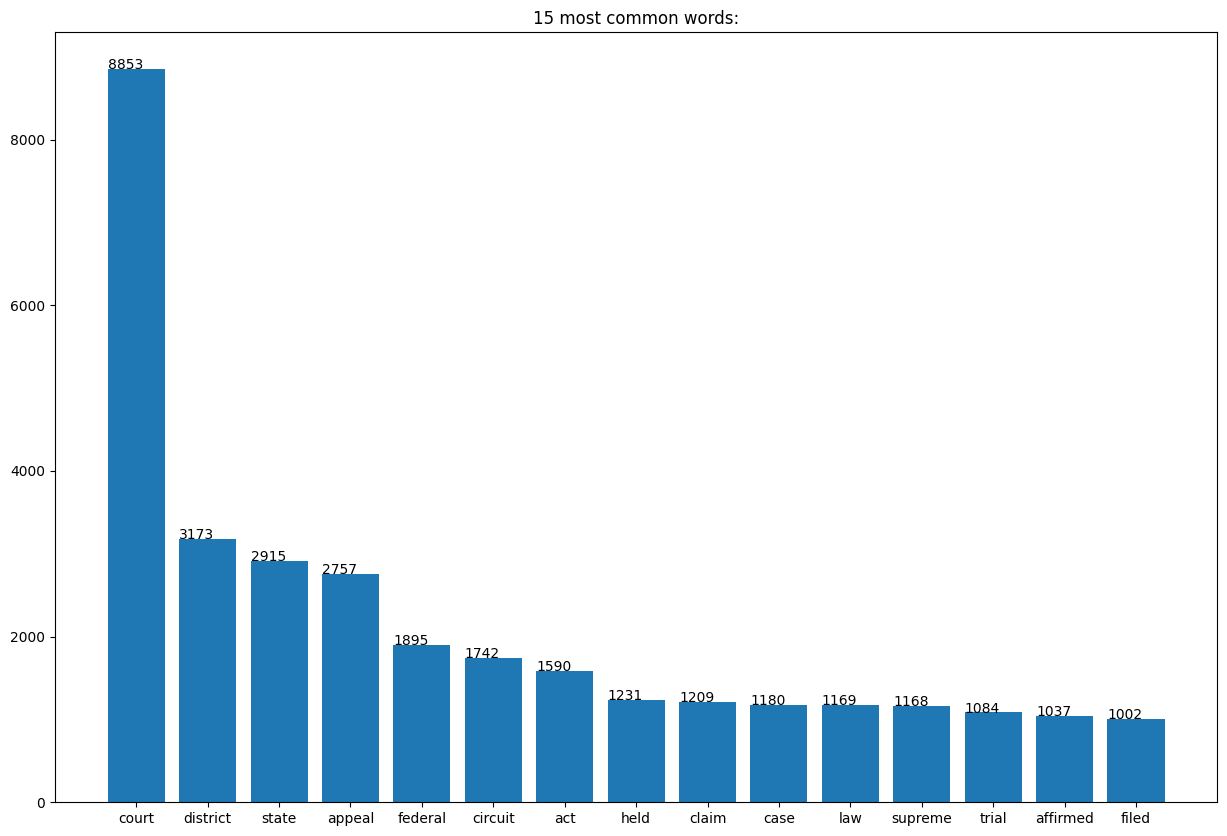

In [41]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

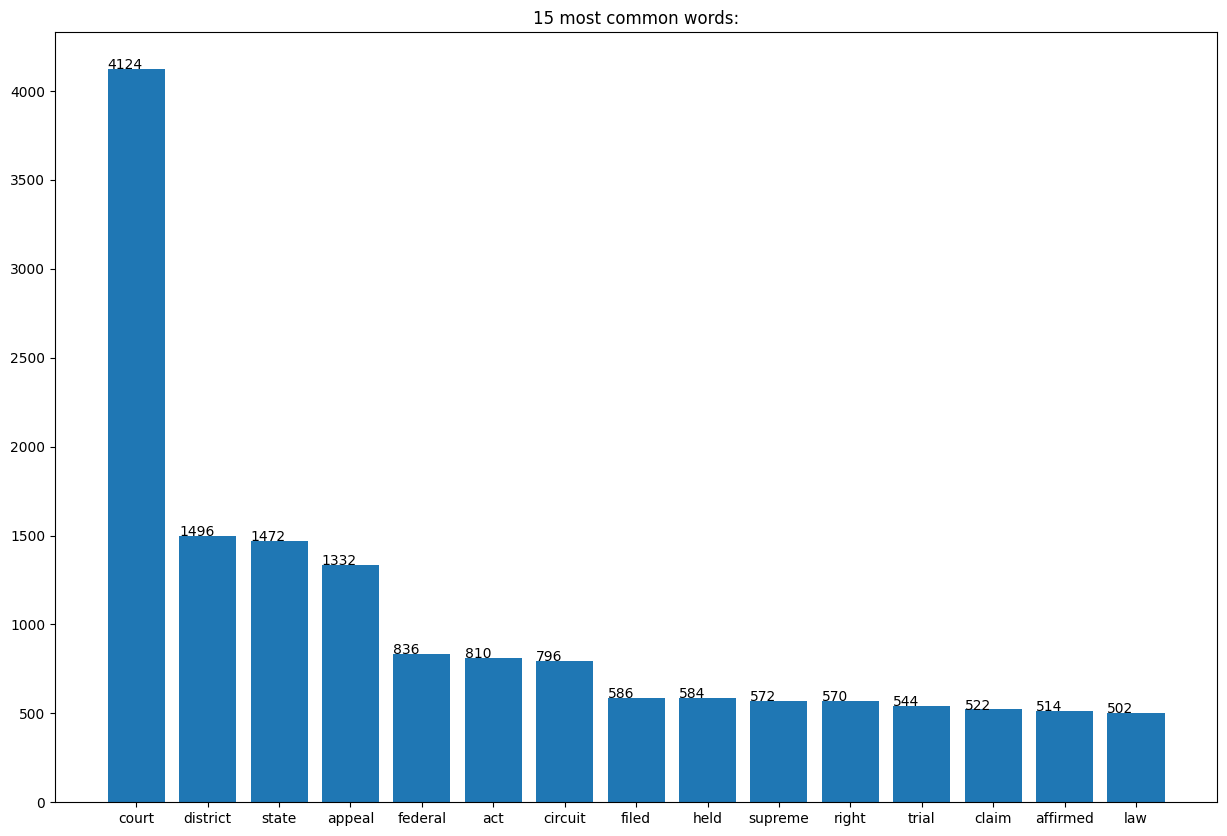

In [42]:
common_wordsT = dict(common_wordsT)
names = list(common_wordsT.keys())
values = list(common_wordsT.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_wordsT)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

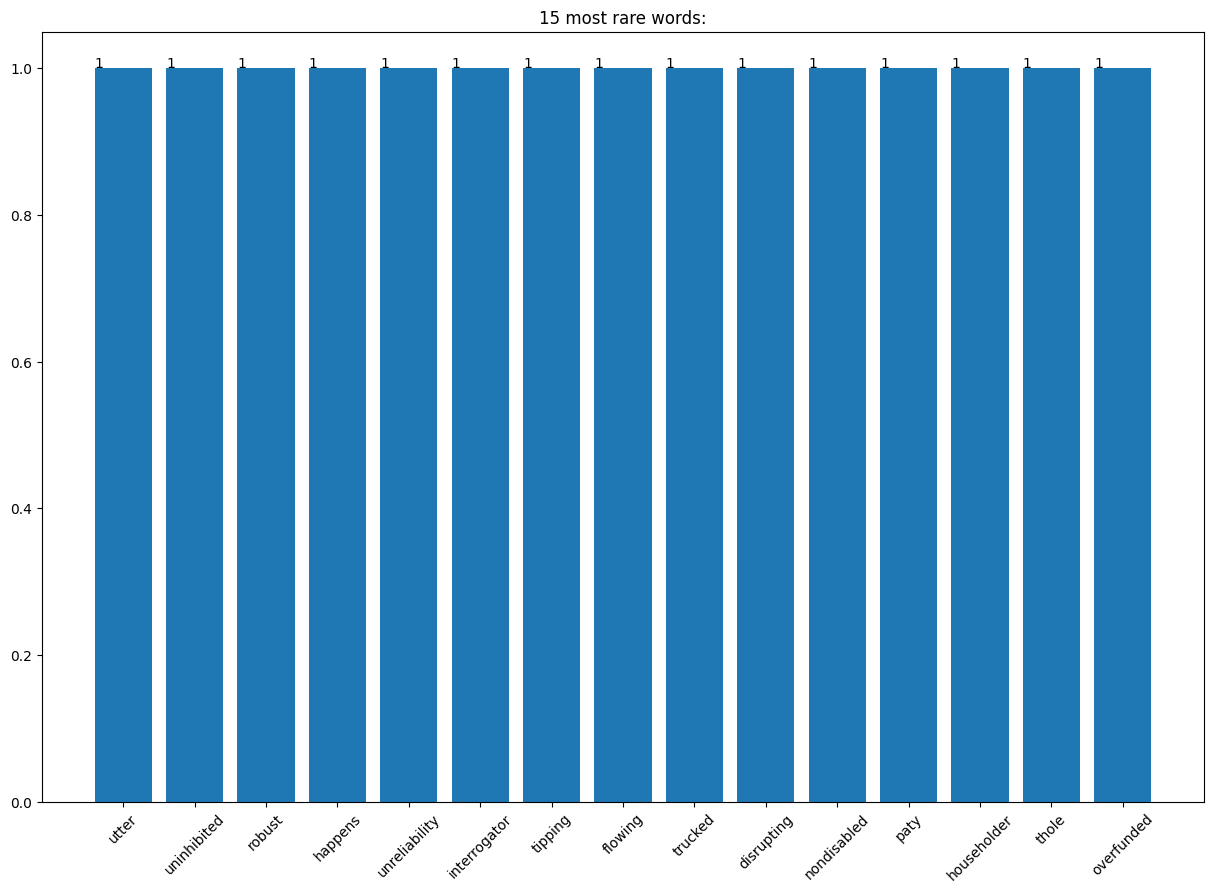

In [ ]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

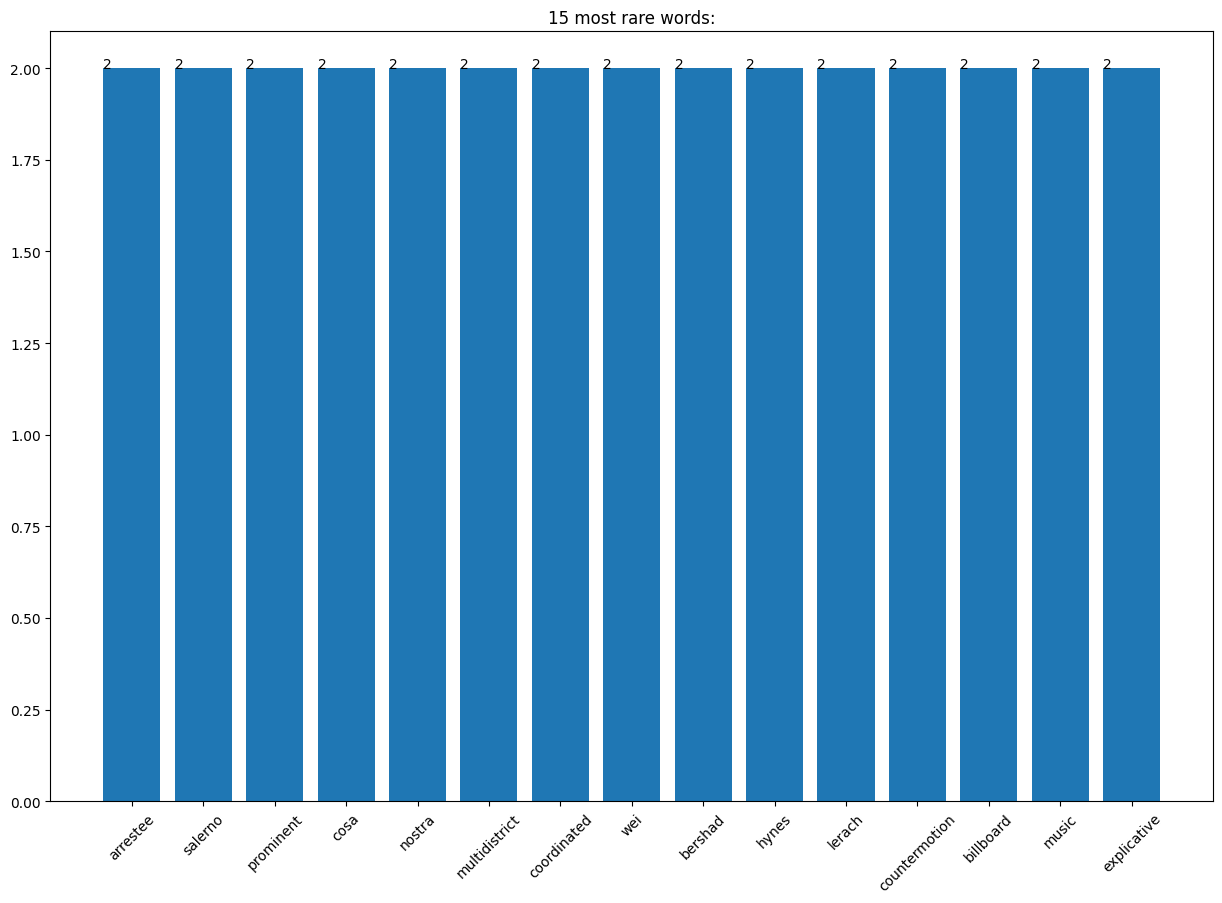

In [43]:
rare_wordsT = dict(rare_wordsT)
names = list(rare_wordsT.keys())
values = list(rare_wordsT.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_wordsT)),values,tick_label=names)
plt.title('15 most rare words:')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
# BOW-TF Embedding

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=(1, 1))

%time tpl_tf = tf_vectorizer.fit_transform(temp['facts_Processed'])
%time tpl_tfT = tf_vectorizer.transform(test['facts_Processed'])
display("Bow-TF :", tpl_tf.shape)
display("Bow-TF :", tpl_tfT.shape)
train_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())
test_tf = pd.DataFrame(tpl_tfT.toarray(), columns=tf_vectorizer.get_feature_names_out())
train_tf.head()


CPU times: user 273 ms, sys: 2.01 ms, total: 275 ms
Wall time: 519 ms
CPU times: user 117 ms, sys: 0 ns, total: 117 ms
Wall time: 189 ms


'Bow-TF :'

(2478, 800)

'Bow-TF :'

(1240, 800)

,abuse,access,accident,according,account,act,acting,action,activity,actual,...,woman,work,worked,worker,working,would,writ,written,year,york
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
test_tf

,abuse,access,accident,according,account,act,acting,action,activity,actual,...,woman,work,worked,worker,working,would,writ,written,year,york
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1236,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Preparing processed and BoW-TF embedded data for Classification
train_tf_m = pd.concat([temp, train_tf], axis = 1)
test_tf_m = pd.concat([test, test_tf], axis = 1)
train_tf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
test_tf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
print(train_tf_m.shape)
print(test_tf_m.shape)
train_tf_m

(2478, 804)
(1240, 803)


,ID,first_party,second_party,first_party_winner,abuse,access,accident,according,account,act,...,woman,work,worked,worker,working,would,writ,written,year,york
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAIN_0003,Linkletter,Walker,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAIN_0004,William Earl Fikes,Alabama,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",1,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,2,0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2475,TRAIN_2475,Peguero,United States,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_tf_m

,ID,first_party,second_party,abuse,access,accident,according,account,act,acting,...,woman,work,worked,worker,working,would,writ,written,year,york
0,TEST_0000,Salerno,United States,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TEST_0003,Harold Kaufman,United States,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TEST_0004,Berger,Hanlon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train_tf_m.describe()

,first_party_winner,abuse,access,accident,according,account,act,acting,action,activity,...,woman,work,worked,worker,working,would,writ,written,year,york
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,...,2478.000000,2478.000000,2478.000000,2478.00000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,0.665456,0.029459,0.039952,0.020985,0.027441,0.033495,0.641646,0.022195,0.247780,0.066182,...,0.048426,0.079500,0.025827,0.04318,0.028652,0.263115,0.054479,0.020985,0.271994,0.107345
std,0.471926,0.215328,0.309351,0.185146,0.170650,0.268235,1.117950,0.160464,0.668775,0.329633,...,0.338720,0.424016,0.184532,0.29963,0.189517,0.606934,0.293686,0.166792,0.691571,0.528343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,7.000000,4.000000,2.000000,6.000000,10.000000,3.000000,8.000000,5.000000,...,6.000000,7.000000,3.000000,6.00000,4.000000,5.000000,3.000000,3.000000,7.000000,7.000000


In [58]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=(1,1))

%time tpl_tfidf = tfidf_vectorizer.fit_transform(temp['facts_Processed'])
%time tpl_tfidfT = tfidf_vectorizer.transform(test['facts_Processed'])

display("Bow-TF:IDF :", tpl_tfidf.shape)
display("Bow-TF:IDF :", tpl_tfidfT.shape)

train_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=temp.index)
test_tfidf = pd.DataFrame(tpl_tfidfT.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=test.index)
display(train_tfidf.head())
display(test_tfidf.head())

CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 139 ms
CPU times: user 62.3 ms, sys: 0 ns, total: 62.3 ms
Wall time: 62.4 ms


'Bow-TF:IDF :'

(2478, 670)

'Bow-TF:IDF :'

(1240, 670)

,abuse,access,according,account,act,acting,action,activity,actual,additional,...,witness,woman,work,worked,worker,working,would,writ,year,york
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.14127,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.281085,0.089681,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.18325,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.103997,0.000000,0.000000,0.0


,abuse,access,according,account,act,acting,action,activity,actual,additional,...,witness,woman,work,worked,worker,working,would,writ,year,york
0,0.0,0.0,0.0,0.0,0.136351,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.261991,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.069597,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
train_tfidf_m = pd.concat([temp, train_tfidf], axis = 1)
test_tfidf_m = pd.concat([test, test_tfidf], axis = 1)
train_tfidf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
test_tfidf_m.drop(columns=['facts_Org', 'facts_Processed'], inplace = True)
print(train_tfidf_m.shape)
print(test_tfidf_m.shape)
display(train_tfidf_m.head())
display(train_tfidf_m.tail())

(2478, 674)
(1240, 673)


,ID,first_party,second_party,first_party_winner,abuse,access,according,account,act,acting,...,witness,woman,work,worked,worker,working,would,writ,year,york
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,1,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.281085,0.089681,0.0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",1,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,TRAIN_0003,Linkletter,Walker,0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,TRAIN_0004,William Earl Fikes,Alabama,1,0.0,0.18325,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.103997,0.000000,0.000000,0.0


,ID,first_party,second_party,first_party_winner,abuse,access,according,account,act,acting,...,witness,woman,work,worked,worker,working,would,writ,year,york
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",1,0.0,0.0,0.000000,0.0,0.157253,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.103833,0.0,0.21303,0.0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",1,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.103559,0.0,0.00000,0.0
2475,TRAIN_2475,Peguero,United States,0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,0,0.0,0.0,0.000000,0.0,0.174673,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0
2477,TRAIN_2477,Markman,"Westview Instruments, Inc.",0,0.0,0.0,0.134274,0.0,0.000000,0.0,...,0.135167,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0


In [60]:
test_tfidf_m

,ID,first_party,second_party,abuse,access,according,account,act,acting,action,...,witness,woman,work,worked,worker,working,would,writ,year,york
0,TEST_0000,Salerno,United States,0.0,0.0,0.000000,0.0,0.136351,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",0.0,0.0,0.000000,0.0,0.000000,0.0,0.261991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",0.0,0.0,0.000000,0.0,0.069597,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,TEST_0003,Harold Kaufman,United States,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,TEST_0004,Berger,Hanlon,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",0.0,0.0,0.198955,0.0,0.085500,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166307
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",0.0,0.0,0.000000,0.0,0.067014,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,0.0,0.0,0.000000,0.0,0.000000,0.0,0.069865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
train_tf_m.describe(include='object')

,ID,first_party,second_party
count,2478,2478,2478
unique,2478,2110,1974
top,TRAIN_0000,United States,United States
freq,1,154,240


In [ ]:
train_tfidf_m.describe(include='object')

,ID,first_party,second_party
count,2478,2478,2478
unique,2478,2110,1974
top,TRAIN_0000,United States,United States
freq,1,154,240


In [ ]:
train_tfidf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 674 entries, ID to york
dtypes: float64(670), object(3), uint8(1)
memory usage: 12.7+ MB


In [ ]:
train_tf_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 804 entries, ID to york
dtypes: int64(800), object(3), uint8(1)
memory usage: 15.2+ MB


###to_csv

In [71]:
train_tf_m

,ID,first_party,second_party,first_party_winner,abuse,access,accident,according,account,act,...,woman,work,worked,worker,working,would,writ,written,year,york
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAIN_0003,Linkletter,Walker,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAIN_0004,William Earl Fikes,Alabama,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",1,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,2,0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2475,TRAIN_2475,Peguero,United States,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [72]:
test_tf_m

,ID,first_party,second_party,abuse,access,accident,according,account,act,acting,...,woman,work,worked,worker,working,would,writ,written,year,york
0,TEST_0000,Salerno,United States,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TEST_0003,Harold Kaufman,United States,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TEST_0004,Berger,Hanlon,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
train_tfidf_m

,ID,first_party,second_party,first_party_winner,abuse,access,according,account,act,acting,...,witness,woman,work,worked,worker,working,would,writ,year,york
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,1,0.0,0.00000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,0,0.0,0.00000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.281085,0.089681,0.0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",1,0.0,0.00000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,TRAIN_0003,Linkletter,Walker,0,0.0,0.00000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,TRAIN_0004,William Earl Fikes,Alabama,1,0.0,0.18325,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.103997,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",1,0.0,0.00000,0.000000,0.0,0.157253,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.103833,0.000000,0.213030,0.0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",1,0.0,0.00000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.103559,0.000000,0.000000,0.0
2475,TRAIN_2475,Peguero,United States,0,0.0,0.00000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,0,0.0,0.00000,0.000000,0.0,0.174673,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [74]:
test_tfidf_m

,ID,first_party,second_party,abuse,access,according,account,act,acting,action,...,witness,woman,work,worked,worker,working,would,writ,year,york
0,TEST_0000,Salerno,United States,0.0,0.0,0.000000,0.0,0.136351,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",0.0,0.0,0.000000,0.0,0.000000,0.0,0.261991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",0.0,0.0,0.000000,0.0,0.069597,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,TEST_0003,Harold Kaufman,United States,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,TEST_0004,Berger,Hanlon,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",0.0,0.0,0.198955,0.0,0.085500,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166307
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",0.0,0.0,0.000000,0.0,0.067014,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,0.0,0.0,0.000000,0.0,0.000000,0.0,0.069865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [76]:
train_tf_m.to_csv('train_tf_m.csv')

In [77]:
test_tf_m.to_csv('test_tf_m.csv')

In [78]:
train_tfidf_m.to_csv('train_tfidf_m.csv')

In [79]:
test_tfidf_m.to_csv('test_tfidf_m.csv')

###Stage 3 : Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [ ]:
train_tf_m.columns

Index(['ID', 'first_party', 'second_party', 'first_party_winner', 'abuse',
       'access', 'according', 'account', 'act', 'action',
       ...
       'woman', 'work', 'worker', 'working', 'would', 'writ',
       'writ habeas corpus', 'year', 'year old', 'york'],
      dtype='object', length=804)

In [ ]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [ ]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['first_party_winner']
    X = df.drop('first_party_winner', axis = 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)

    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

In [ ]:
train_tf_m.set_index('ID', drop = True, inplace=True)
train_tfidf_m.set_index('ID', drop = True, inplace=True)

In [ ]:
train_tf_m.drop(columns=['first_party','second_party'],inplace=True)
train_tfidf_m.drop(columns=['first_party','second_party'],inplace=True)

In [ ]:
train_tf_m.to_csv('train_tf_m.csv')

In [ ]:
train_tfidf_m.to_csv('train_tfidf_m.csv')

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (2106, 800)
Test Data Dimensions :  (372, 800)

 Random Forest Classifier
CPU times: user 2.33 s, sys: 7.98 ms, total: 2.34 s
Wall time: 2.34 s

 Confusion Matrix


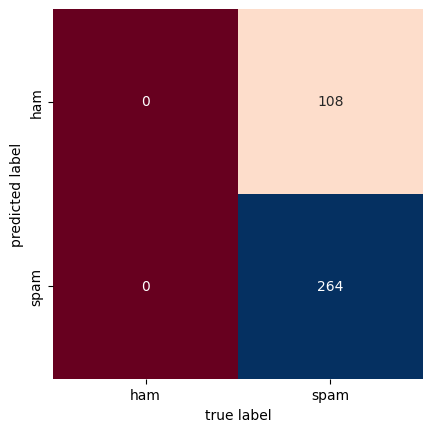


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.71      1.00      0.83       264

    accuracy                           0.71       372
   macro avg       0.35      0.50      0.42       372
weighted avg       0.50      0.71      0.59       372

Overall Accuracy :  70.97
Precision Score :  70.97
Recall Score :  100.0
AUC :  58.14 



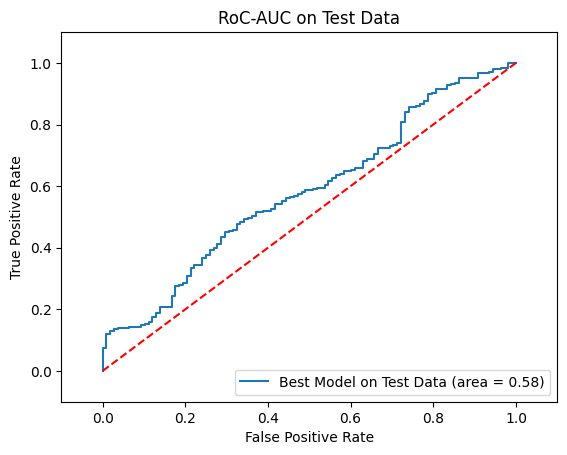

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 3.71 s, sys: 6.77 ms, total: 3.72 s
Wall time: 3.73 s

 Confusion Matrix


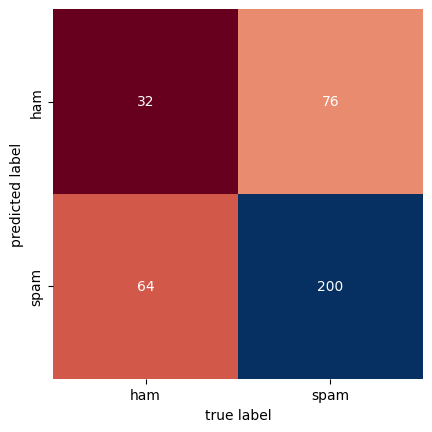


 Classification Report 

              precision    recall  f1-score   support

           0       0.33      0.30      0.31       108
           1       0.72      0.76      0.74       264

    accuracy                           0.62       372
   macro avg       0.53      0.53      0.53       372
weighted avg       0.61      0.62      0.62       372

Overall Accuracy :  62.37
Precision Score :  72.46
Recall Score :  75.76
AUC :  54.7 



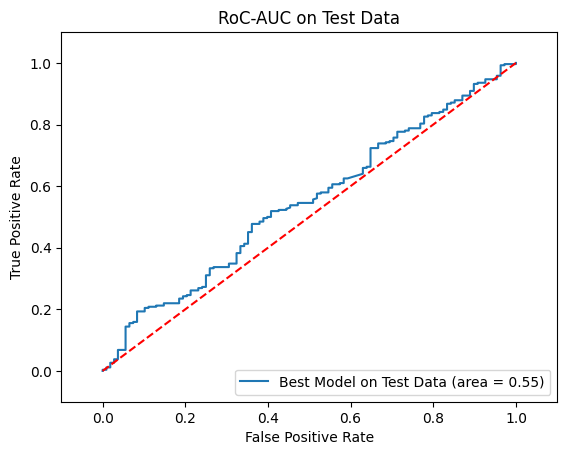

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 1.09 s, sys: 712 µs, total: 1.09 s
Wall time: 1.08 s

 Confusion Matrix


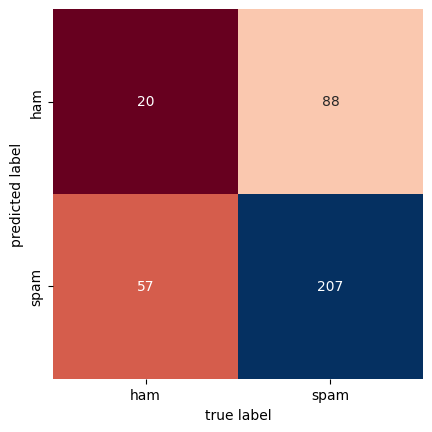


 Classification Report 

              precision    recall  f1-score   support

           0       0.26      0.19      0.22       108
           1       0.70      0.78      0.74       264

    accuracy                           0.61       372
   macro avg       0.48      0.48      0.48       372
weighted avg       0.57      0.61      0.59       372

Overall Accuracy :  61.02
Precision Score :  70.17
Recall Score :  78.41
AUC :  52.19 



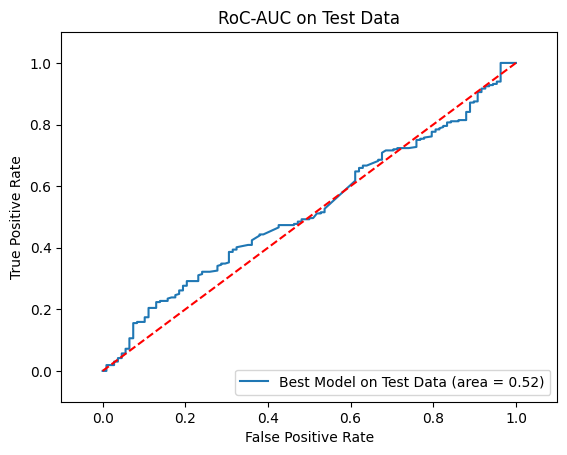

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 20.6 ms, sys: 957 µs, total: 21.5 ms
Wall time: 21.2 ms

 Confusion Matrix


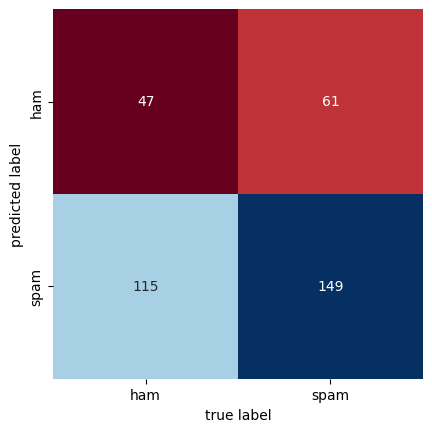


 Classification Report 

              precision    recall  f1-score   support

           0       0.29      0.44      0.35       108
           1       0.71      0.56      0.63       264

    accuracy                           0.53       372
   macro avg       0.50      0.50      0.49       372
weighted avg       0.59      0.53      0.55       372

Overall Accuracy :  52.69
Precision Score :  70.95
Recall Score :  56.44
AUC :  53.49 



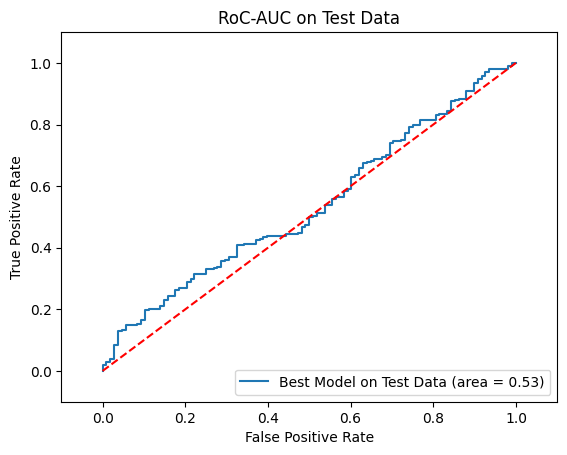

--------------------------------------------------------------------------
CPU times: user 9.91 s, sys: 812 ms, total: 10.7 s
Wall time: 9.97 s


In [ ]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(train_tf_m)

Models on Term Frequency - Bag of Words: Inverse Document Frequency data
Train Data Dimensions :  (2106, 670)
Test Data Dimensions :  (372, 670)

 Random Forest Classifier
CPU times: user 3.38 s, sys: 4.2 ms, total: 3.39 s
Wall time: 3.42 s

 Confusion Matrix


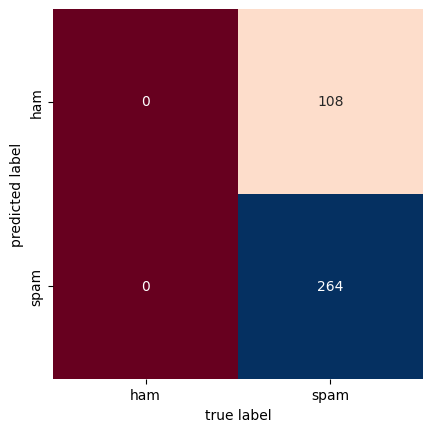


 Classification Report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.71      1.00      0.83       264

    accuracy                           0.71       372
   macro avg       0.35      0.50      0.42       372
weighted avg       0.50      0.71      0.59       372

Overall Accuracy :  70.97
Precision Score :  70.97
Recall Score :  100.0
AUC :  54.42 



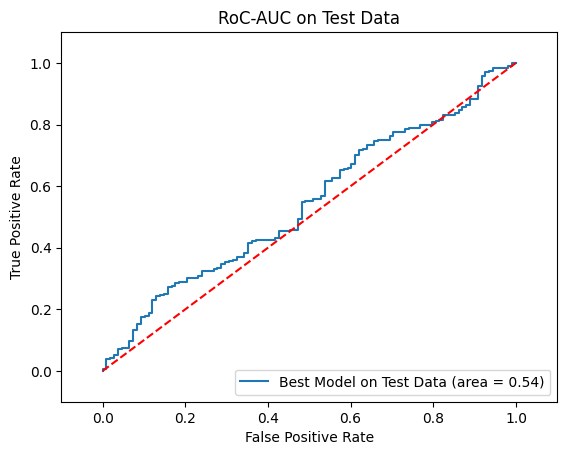

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: user 4.83 s, sys: 5.22 ms, total: 4.84 s
Wall time: 4.85 s

 Confusion Matrix


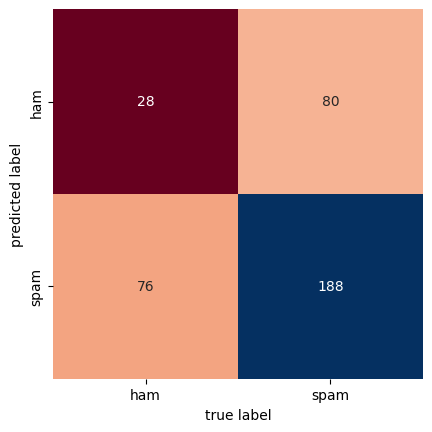


 Classification Report 

              precision    recall  f1-score   support

           0       0.27      0.26      0.26       108
           1       0.70      0.71      0.71       264

    accuracy                           0.58       372
   macro avg       0.49      0.49      0.49       372
weighted avg       0.58      0.58      0.58       372

Overall Accuracy :  58.06
Precision Score :  70.15
Recall Score :  71.21
AUC :  48.73 



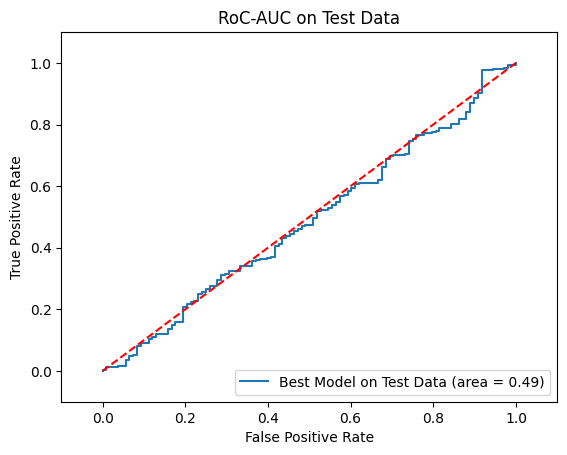

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: user 1.91 s, sys: 0 ns, total: 1.91 s
Wall time: 1.93 s

 Confusion Matrix


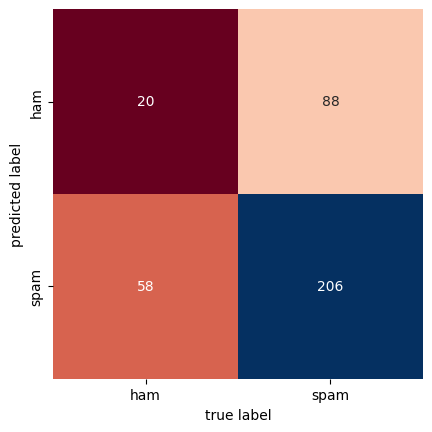


 Classification Report 

              precision    recall  f1-score   support

           0       0.26      0.19      0.22       108
           1       0.70      0.78      0.74       264

    accuracy                           0.61       372
   macro avg       0.48      0.48      0.48       372
weighted avg       0.57      0.61      0.59       372

Overall Accuracy :  60.75
Precision Score :  70.07
Recall Score :  78.03
AUC :  51.31 



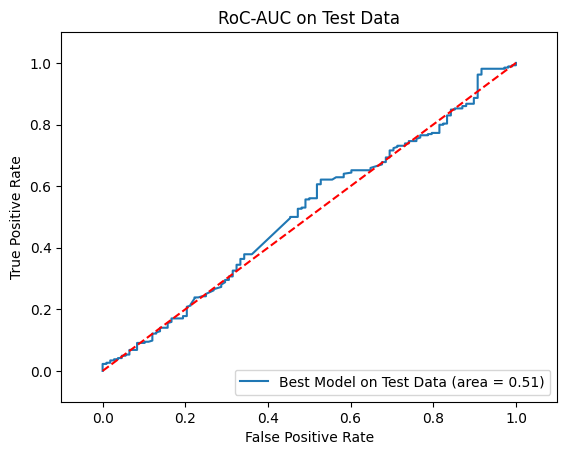

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: user 17.9 ms, sys: 916 µs, total: 18.8 ms
Wall time: 16.6 ms

 Confusion Matrix


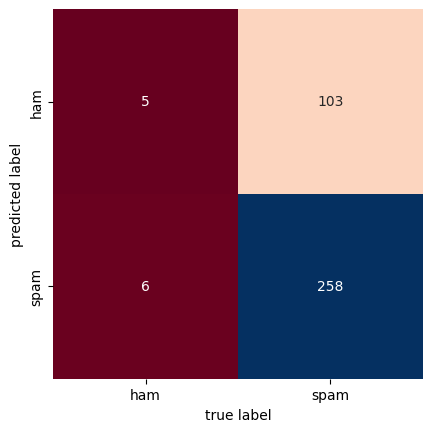


 Classification Report 

              precision    recall  f1-score   support

           0       0.45      0.05      0.08       108
           1       0.71      0.98      0.83       264

    accuracy                           0.71       372
   macro avg       0.58      0.51      0.45       372
weighted avg       0.64      0.71      0.61       372

Overall Accuracy :  70.7
Precision Score :  71.47
Recall Score :  97.73
AUC :  53.31 



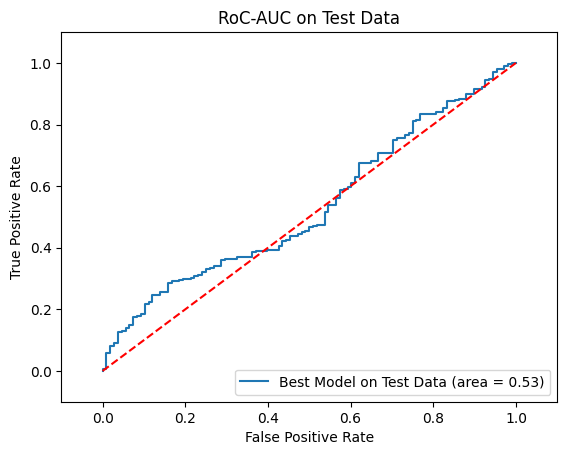

--------------------------------------------------------------------------
CPU times: user 12.9 s, sys: 575 ms, total: 13.5 s
Wall time: 13.3 s


In [ ]:
print('Models on Term Frequency - Bag of Words: Inverse Document Frequency data')
%time model_dvt(train_tfidf_m)